실행 시간이 너무 오래걸려 colab 환경에서 실행 
- A100 GPU

# [Convolutional Neural Network (CNN)]
[instructions]

The goal of this assignment is to implement a Convolutional Neural Network (CNN) using
TensorFlow and scikit-learn for image classification on the CIFAR-10 dataset.
Dataset:
CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) is a well-known dataset that consists
of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset
is divided into 50,000 training images and 10,000 testing images.

You can follow the procedures below.
1) Data Preprocessing:
- Load the CIFAR-10 dataset using TensorFlow or scikit-learn.
import sklearn
import tensorflow as tf
(X_train_full, y_train_full), (X_test, y_test) =
tf.keras.datasets.cifar10.load_data()
- Normalize the pixel values of the images to be in the range [0, 1].
- Split the dataset into training and testing sets.
2) Build a Convolutional Neural Network:
- Design a CNN architecture for image classification using the loss function
loss="sparse_categorical_crossentropy"
- Use convolutional layers, pooling layers, and fully connected layers. Just for example,
DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
tf.keras.layers.MaxPool2D(),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
tf.keras.layers.MaxPool2D(),…
- Experiment with different architectures to find an optimal one.
3) Compile and Train the Model:
- Compile the model using an appropriate loss function, optimizer, and metrics.
- Train the model on the training dataset.
- Monitor and visualize the training process.
4) Evaluate the Model:
- Evaluate the trained model on the testing dataset.
- Calculate and report accuracy, and any other relevant metrics.
- Provide confusion matrix and classification report.
5) Fine-Tuning:
- Experiment with hyperparameter tuning to improve the model performance.
- Try different epochs, optimization algorithms (SGD, Momentum, RMSProp, Adam, etc),
learning rates, batch sizes, non-linear activation functions (such as ReLU, Sigmoid, T

In [1]:
from packaging import version
import tensorflow as tf
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Load CIFAR-10 dataset

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [3]:
# CIFAR-10 클래스 이름
# ref: https://www.cs.toronto.edu/~kriz/cifar.html
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

### Normalize pixel values to [0, 1]
uses min-max scaling

In [4]:
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

X_train_min = X_train_full.min()
X_train_max = X_train_full.max()

X_train_full = (X_train_full - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)

## Build CNN

In [5]:
tf.random.set_seed(42)

In [6]:
# ref: https://github.com/ageron/handson-ml3/blob/main/14_deep_computer_vision_with_cnns.ipynb
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                       kernel_size=3,
                       padding="same",
                       activation="relu",
                       kernel_initializer="he_normal")

In [7]:
# build model
model = tf.keras.Sequential([
    # 기본으로 3개 conv 블록 사용
    # 첫번째 conv
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(),

    # 두번째 conv
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),

    # 세번째 conv
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),

    # fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 모델 구조 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,649,482 (6.29 MB)

 Trainable params: 1,649,482 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

### 훈련

In [9]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [10]:
# 기본 epochs=5
history_baseline = model.fit(X_train_full, y_train_full,
                             epochs=5,
                             validation_split=0.1,
                             verbose=1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.1599 - loss: 2.2194 - val_accuracy: 0.3828 - val_loss: 1.6285
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3690 - loss: 1.6855 - val_accuracy: 0.4766 - val_loss: 1.4348
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4519 - loss: 1.4989 - val_accuracy: 0.5314 - val_loss: 1.3232
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4999 - loss: 1.3884 - val_accuracy: 0.5534 - val_loss: 1.2714
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5428 - loss: 1.2855 - val_accuracy: 0.5840 - val_loss: 1.1833


### evaluate

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Loss: 1.2112
Test Accuracy: 0.5717 (57.17%)


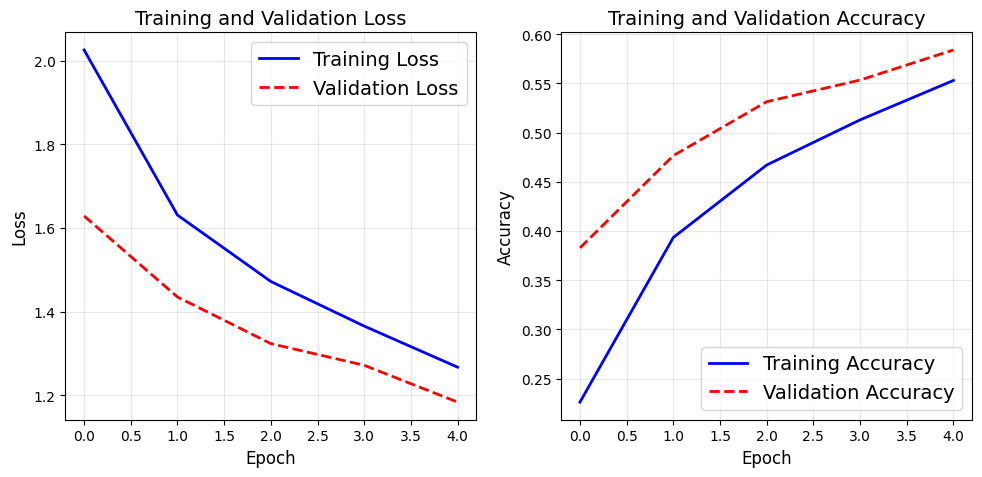

In [17]:
# Training History Visualization
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history_baseline.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history_baseline.history['val_loss'], 'r--', label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(history_baseline.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history_baseline.history['val_accuracy'], 'r--', label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- validation loss가 training loss보다 낮은 비정상적인 상황이 확인된다. 
    - 5 epoch은 짧은 학습 시간이어서 underfitting의 가능성이 있는 것으로 보인다.

### 5. Fine-Tuning

- with different
    - epochs
    - learning rate
    - activation_functions (ReLU, Sigmoid, Tanh)
    - optimizers (SGD, Momentum, RMSProp, Adam, etc)
    - batch sizes

In [18]:
# 여러 비교 과정에서 재사용될 메소드 정의

def build_cnn_model(
    activation="relu",
    optimizer="Adam",
    learning_rate=0.001,
    input_shape=[32, 32, 3]
):
    tf.random.set_seed(42)

    # 활성화 함수에 따른 kernel_initializer 선택
    if activation == "relu":
        kernel_init = "he_normal"
    else:
        kernel_init = "glorot_uniform"

    # DefaultConv2D를 활성화 함수에 맞게 재정의
    Conv2D_layer = partial(tf.keras.layers.Conv2D,
                           kernel_size=3,
                           padding="same",
                           activation=activation,
                           kernel_initializer=kernel_init)

    # 모델 빌드
    model = tf.keras.Sequential([
        # 첫 번째 Conv 블록
        Conv2D_layer(filters=64, kernel_size=7, input_shape=input_shape),
        tf.keras.layers.MaxPool2D(),

        # 두 번째 Conv 블록
        Conv2D_layer(filters=128),
        Conv2D_layer(filters=128),
        tf.keras.layers.MaxPool2D(),

        # 세 번째 Conv 블록
        Conv2D_layer(filters=256),
        Conv2D_layer(filters=256),
        tf.keras.layers.MaxPool2D(),

        # Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation=activation,
                              kernel_initializer=kernel_init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=64, activation=activation,
                              kernel_initializer=kernel_init),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=10, activation="softmax")
    ])

    # 옵티마이저 선택
    if optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "Momentum":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == "RMSProp":
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "Nadam":
        opt = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # 모델 컴파일
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=opt,
        metrics=["accuracy"]
    )

    return model

In [19]:
def train_and_evaluate_model(
    model,
    X_train, y_train,
    X_test, y_test,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=0
):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=verbose
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

1. epochs comparsion

In [20]:
def compare_epochs(epochs_list=[5, 10, 20, 30], learning_rate=0.001):
    results = {}

    for epochs in epochs_list:
        print(f"\nepochs={epochs}")
        model = build_cnn_model(
            activation="relu",
            optimizer="Adam",
            learning_rate=learning_rate
        )

        model, history, test_loss, test_acc = train_and_evaluate_model(
            model, X_train_full, y_train_full,
            X_test, y_test,
            epochs=epochs,
            verbose=1
        )

        results[epochs] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    for epochs in epochs_list:
        history = results[epochs]['history']
        axes[0].plot(history.history['accuracy'],
                    label=f'Epochs={epochs} (Final: {results[epochs]["test_accuracy"]:.4f})',
                    marker='o')
        if 'val_accuracy' in history.history:
            axes[0].plot(history.history['val_accuracy'],
                        label=f'Epochs={epochs} Val',
                        linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Epochs')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    for epochs in epochs_list:
        history = results[epochs]['history']
        axes[1].plot(history.history['loss'],
                    label=f'Epochs={epochs} (Final Test Loss: {results[epochs]["test_loss"]:.4f})',
                    marker='o')
        if 'val_loss' in history.history:
            axes[1].plot(history.history['val_loss'],
                        label=f'Epochs={epochs} Val',
                        linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Epochs')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results


epochs=5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1573 - loss: 2.2151 - val_accuracy: 0.3920 - val_loss: 1.5837
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3848 - loss: 1.6464 - val_accuracy: 0.4942 - val_loss: 1.3794
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4741 - loss: 1.4398 - val_accuracy: 0.5758 - val_loss: 1.2281
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5354 - loss: 1.3094 - val_accuracy: 0.5988 - val_loss: 1.1488
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5825 - loss: 1.1899 - val_accuracy: 0.6142 - val_loss: 1.1001
Test Accuracy: 0.6012, Test Loss: 1.1444

epochs=10
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1897 - loss: 2.1454 - val_accuracy: 0.4288 - val_loss: 1.5794
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3964 - loss: 1.6343 - val_accuracy: 0.5220 - val_loss: 1.3238
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━

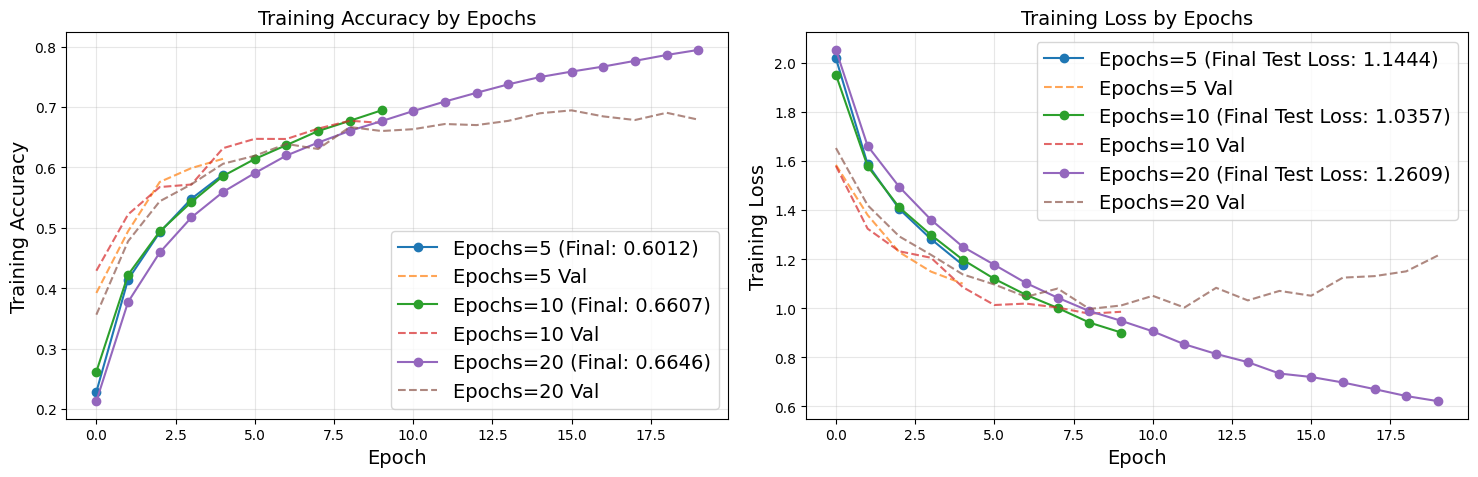

In [21]:
epoch_results = compare_epochs(epochs_list=[5, 10, 20], learning_rate=0.001)

- epoch = 20에서 오히려 training accuracy가 감소하며 과적합을 보임.
  - val accuracy가 떨어지고 training loss가 불안정한 양상을 보임(오른쪽 그래프). 과적합이 발생했음을 확인 가능.
- 가장 적절한 epoch는 10으로 보인다.

2. learning rate comparison

In [22]:
def compare_learning_rates(lr_list=[0.0001, 0.001, 0.01], epochs=10):
    results = {}

    for lr in lr_list:
        print(f"\nlearning_rate={lr}")
        try:
            model = build_cnn_model(
                activation="relu",
                optimizer="Adam",
                learning_rate=lr
            )

            model, history, test_loss, test_acc = train_and_evaluate_model(
                model, X_train_full, y_train_full,
                X_test, y_test,
                epochs=epochs,
                verbose=1
            )

            results[lr] = {
                'history': history,
                'test_loss': test_loss,
                'test_accuracy': test_acc,
                'success': True
            }
            print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
        except Exception as e:
            print(f"Error with lr={lr}: {str(e)}")
            results[lr] = {'success': False}

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    for lr in lr_list:
        if lr in results and results[lr].get('success', False):
            history = results[lr]['history']
            axes[0].plot(history.history['accuracy'],
                        label=f'LR={lr} (Final: {results[lr]["test_accuracy"]:.4f})',
                        marker='o')
            if 'val_accuracy' in history.history:
                axes[0].plot(history.history['val_accuracy'],
                            label=f'LR={lr} Val',
                            linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Learning Rate')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    for lr in lr_list:
        if lr in results and results[lr].get('success', False):
            history = results[lr]['history']
            axes[1].plot(history.history['loss'],
                        label=f'LR={lr} (Final Test Loss: {results[lr]["test_loss"]:.4f})',
                        marker='o')
            if 'val_loss' in history.history:
                axes[1].plot(history.history['val_loss'],
                            label=f'LR={lr} Val',
                            linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Learning Rate')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results


learning_rate=0.0001
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.1503 - loss: 2.2475 - val_accuracy: 0.3988 - val_loss: 1.7387
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3151 - loss: 1.8503 - val_accuracy: 0.4920 - val_loss: 1.4397
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4158 - loss: 1.6177 - val_accuracy: 0.5636 - val_loss: 1.2694
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4861 - loss: 1.4393 - val_accuracy: 0.6130 - val_loss: 1.1566
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5394 - loss: 1.3136 - val_accuracy: 0.6368 - val_loss: 1.0607
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5868 - loss: 1.1926 - val_accuracy: 0.6610 - val_loss: 0.9668
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6229 - loss: 1.1002 - val_accuracy: 0.6944 - val_loss: 0.9143
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0

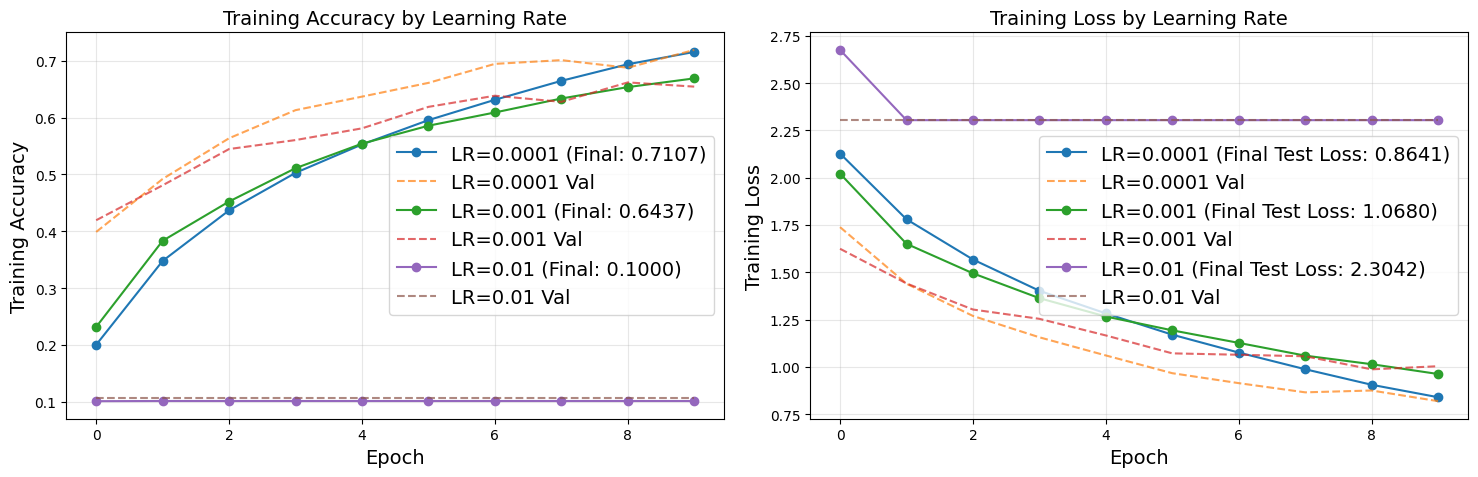

In [23]:
lr_results = compare_learning_rates(lr_list=[0.0001, 0.001, 0.01], epochs=10)

- lr = 0.1일경우 가장 낮은 accuracy를 보임을 확인할 수 있다.
- 따라서 lr = 0.0001 일 경우, 가장 낮은 lr이 좋은 성능을 보임을 알 수 있다. 복잡한 구조이기 때문에 learning rate를 낮은 값으로 두는 게 좋은 방법임을 알 수 있다.

3. activation function comparison


activation=relu
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1782 - loss: 2.1442 - val_accuracy: 0.3938 - val_loss: 1.5905
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3572 - loss: 1.6872 - val_accuracy: 0.4788 - val_loss: 1.4075
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4498 - loss: 1.4998 - val_accuracy: 0.5386 - val_loss: 1.2682
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5093 - loss: 1.3743 - val_accuracy: 0.5728 - val_loss: 1.1866
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5500 - loss: 1.2668 - val_accuracy: 0.6064 - val_loss: 1.1212
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5878 - loss: 1.1756 - val_accuracy: 0.6412 - val_loss: 1.0524
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6142 - loss: 1.1202 - val_accuracy: 0.6412 - val_loss: 1.0531
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6389

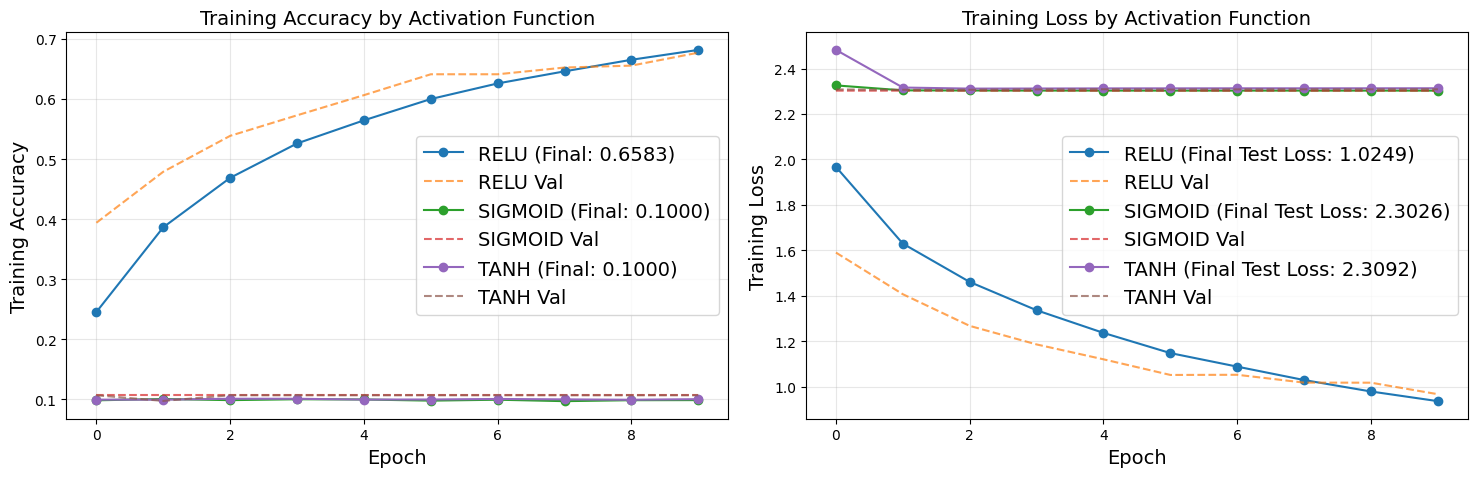

In [24]:
def compare_activations(activation_list=["relu", "sigmoid", "tanh"],
                       epochs=10, learning_rate=0.001):
    results = {}

    for activation in activation_list:
        print(f"\nactivation={activation}")
        model = build_cnn_model(
            activation=activation,
            optimizer="Adam",
            learning_rate=learning_rate
        )

        model, history, test_loss, test_acc = train_and_evaluate_model(
            model, X_train_full, y_train_full,
            X_test, y_test,
            epochs=epochs,
            verbose=1
        )

        results[activation] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    for activation in activation_list:
        history = results[activation]['history']
        axes[0].plot(history.history['accuracy'],
                    label=f'{activation.upper()} (Final: {results[activation]["test_accuracy"]:.4f})',
                    marker='o')
        if 'val_accuracy' in history.history:
            axes[0].plot(history.history['val_accuracy'],
                        label=f'{activation.upper()} Val',
                        linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Activation Function')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    for activation in activation_list:
        history = results[activation]['history']
        axes[1].plot(history.history['loss'],
                    label=f'{activation.upper()} (Final Test Loss: {results[activation]["test_loss"]:.4f})',
                    marker='o')
        if 'val_loss' in history.history:
            axes[1].plot(history.history['val_loss'],
                        label=f'{activation.upper()} Val',
                        linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Activation Function')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results
activation_results = compare_activations(activation_list=["relu", "sigmoid", "tanh"],
                                        epochs=10, learning_rate=0.001)

- activation function은 RELU가 가장 적절한 성능을 보인다.
- tanh와 sigmoid 전부 매우 낮은 accuracy (0.1)을 보임을 확인할 수 있다.
  - 이는 gradient vanishing 현상이 원인으로 gradient가 0으로 전파되면서 accuracy가 크게 감소했음을 추측해볼 수 있다.

4. optimizer comparison

In [25]:
def compare_optimizers(optimizer_list=["SGD", "Momentum", "RMSProp", "Adam"],
                      epochs=10, learning_rate=0.001):
    results = {}

    for optimizer in optimizer_list:
        print(f"\noptimizer={optimizer}")
        model = build_cnn_model(
            activation="relu",
            optimizer=optimizer,
            learning_rate=learning_rate
        )

        model, history, test_loss, test_acc = train_and_evaluate_model(
            model, X_train_full, y_train_full,
            X_test, y_test,
            epochs=epochs,
            verbose=1
        )

        results[optimizer] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    for optimizer in optimizer_list:
        history = results[optimizer]['history']
        axes[0].plot(history.history['accuracy'],
                    label=f'{optimizer} (Final: {results[optimizer]["test_accuracy"]:.4f})',
                    marker='o')
        if 'val_accuracy' in history.history:
            axes[0].plot(history.history['val_accuracy'],
                        label=f'{optimizer} Val',
                        linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Optimizer')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    for optimizer in optimizer_list:
        history = results[optimizer]['history']
        axes[1].plot(history.history['loss'],
                    label=f'{optimizer} (Final Test Loss: {results[optimizer]["test_loss"]:.4f})',
                    marker='o')
        if 'val_loss' in history.history:
            axes[1].plot(history.history['val_loss'],
                        label=f'{optimizer} Val',
                        linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Optimizer')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results


optimizer=SGD
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1326 - loss: 2.2999 - val_accuracy: 0.2612 - val_loss: 2.1341
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1977 - loss: 2.1575 - val_accuracy: 0.2918 - val_loss: 2.0305
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2323 - loss: 2.0764 - val_accuracy: 0.3260 - val_loss: 1.9105
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2538 - loss: 2.0144 - val_accuracy: 0.3218 - val_loss: 1.8905
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2769 - loss: 1.9590 - val_accuracy: 0.3168 - val_loss: 1.9232
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2984 - loss: 1.9026 - val_accuracy: 0.4190 - val_loss: 1.6829
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3186 - loss: 1.8551 - val_accuracy: 0.4062 - val_loss: 1.6668
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3293 -

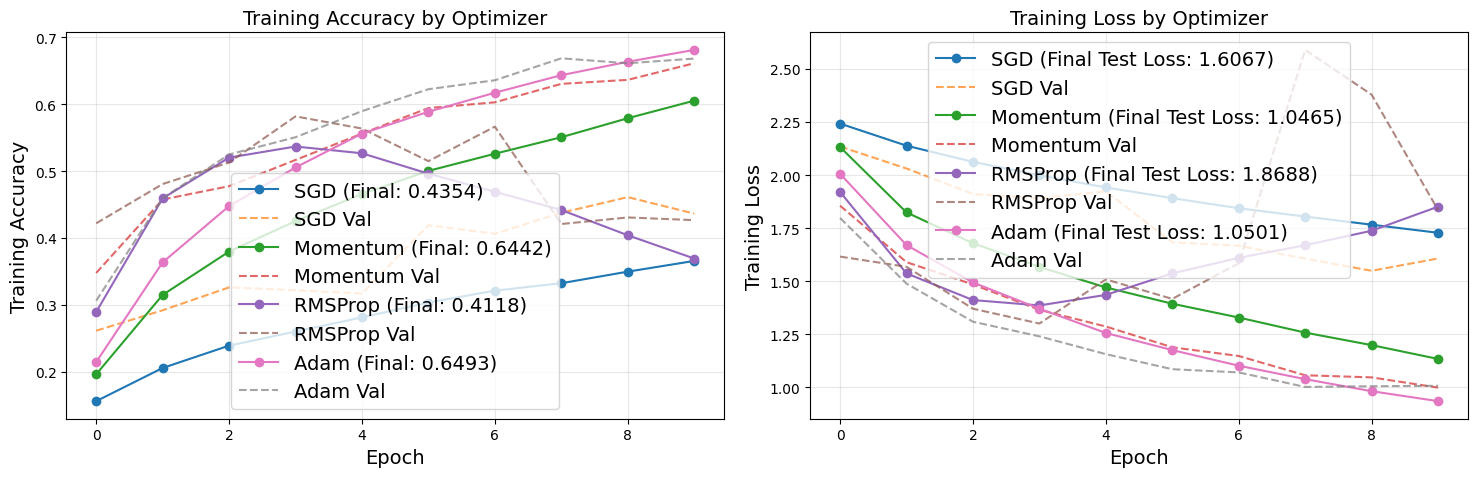

In [26]:
optimizer_results = compare_optimizers(optimizer_list=["SGD", "Momentum", "RMSProp", "Adam"],
                                        epochs=10, learning_rate=0.001)

- Adam이 가장 일관성있고 좋은 training accuracy를 보임을 확인할 수 있다.
- RMSProp는 epoch 수가 증가할 수록 오히려 accuracy가 낮아지는 양상을 보인다.
  - RMSProp 특징은 길게 학습하면서 adaptive learning rate가 지나치게 감소하면서 학습이 안된 것으로 추측된다.
- 가장 기본적인 SGD는 가장 낮은 성능을 보이고 있다.
  - lr = 0.001로 설정한 것이 원인일 것으로 파악됨. (lr = 0.01~0.1로 설정 필요)

5. batch size comparison

In [27]:
def compare_batch_sizes(batch_size_list=[32, 64, 128], epochs=10, learning_rate=0.001):
    results = {}

    for batch_size in batch_size_list:
        print(f"\nbatch_size={batch_size}")
        model = build_cnn_model(
            activation="relu",
            optimizer="Adam",
            learning_rate=learning_rate
        )

        model, history, test_loss, test_acc = train_and_evaluate_model(
            model, X_train_full, y_train_full,
            X_test, y_test,
            epochs=epochs,
            batch_size=batch_size,
            verbose=1
        )

        results[batch_size] = {
            'history': history,
            'test_loss': test_loss,
            'test_accuracy': test_acc
        }
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    for batch_size in batch_size_list:
        history = results[batch_size]['history']
        axes[0].plot(history.history['accuracy'],
                    label=f'Batch={batch_size} (Final: {results[batch_size]["test_accuracy"]:.4f})',
                    marker='o')
        if 'val_accuracy' in history.history:
            axes[0].plot(history.history['val_accuracy'],
                        label=f'Batch={batch_size} Val',
                        linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Accuracy')
    axes[0].set_title('Training Accuracy by Batch Size')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss plot
    for batch_size in batch_size_list:
        history = results[batch_size]['history']
        axes[1].plot(history.history['loss'],
                    label=f'Batch={batch_size} (Final Test Loss: {results[batch_size]["test_loss"]:.4f})',
                    marker='o')
        if 'val_loss' in history.history:
            axes[1].plot(history.history['val_loss'],
                        label=f'Batch={batch_size} Val',
                        linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Training Loss')
    axes[1].set_title('Training Loss by Batch Size')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results


batch_size=32
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1948 - loss: 2.1287 - val_accuracy: 0.3784 - val_loss: 1.5974
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3886 - loss: 1.6390 - val_accuracy: 0.4968 - val_loss: 1.3940
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4717 - loss: 1.4605 - val_accuracy: 0.5758 - val_loss: 1.2163
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5316 - loss: 1.3170 - val_accuracy: 0.5962 - val_loss: 1.1424
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5747 - loss: 1.2161 - val_accuracy: 0.6266 - val_loss: 1.0837
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6107 - loss: 1.1296 - val_accuracy: 0.6482 - val_loss: 1.0379
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6333 - loss: 1.0637 - val_accuracy: 0.6688 - val_loss: 0.9996
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6665 -

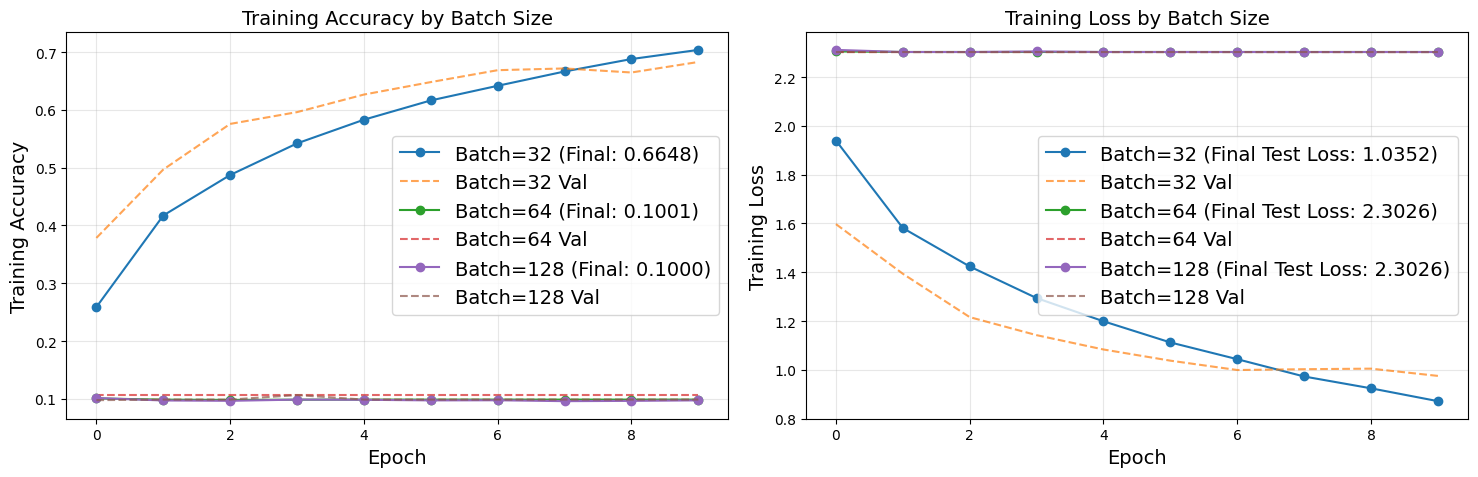

In [28]:
batch_size_results = compare_batch_sizes(batch_size_list=[32, 64, 128], epochs=10)

- batch size가 커질수록 training accuracy가 감소함을 확인할 수 있다.
  - 이는 batch size가 커질 수록 gradient noise가 감소하고 sharp minimum으로 과적합할 우려가 있다.


## conclusion
- cifar-10 데이터셋에 대한 cnn 모델을 구현
- 다양한 하이퍼파라미터 튜닝 시행
- 구조:
    - Conv2D 레이어 블록 3개 선택
    - MaxPooling을 사용하여 차원 줄임
    - fully connected layer를 통해 최종 분류 수행
    
- 하이퍼 파라미터 튜닝 결과:
    - epoch = 10
    - learning_rate = 0.0001 (가정: cnn + adam)
    - activation function: ReLU
    - optimizer: Adam
    - batch size: 32
    
- limitations:
    - cifar-10은 복잡한 자연 이미지이므로 앞서 mnist보다 전체적으로 낮은 정확도를 보임
    - 더 깊은 네트워크를 통해 성능 개선 가능.